In [2]:
import sys
import os

import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append(os.path.abspath("../.."))
from wine_quality import dataset


2025-02-08 09:49:58.283 | INFO     | wine_quality.config:<module>:11 - PROJ_ROOT path is: C:\Users\pc\Documents\AI_Projects\wine\wine_quality


In [16]:
df = dataset.load_raw_data("winequality-red.csv", ";")

# Separate features and target variable
X = df.drop(columns=["quality"])  # Features
y = df["quality"]  # Target (categorical)

# Define transformations
numerical_features = X.columns.tolist()

# Preprocessing pipeline for X
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features)  # Standardize numerical data
])

# Create pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor)
])

# Fit and transform the dataset
X_transformed = pipeline.fit_transform(X)

# Convert X_transformed into a DataFrame with proper column names
num_cols = [col for col in numerical_features]
X_transformed_df = pd.DataFrame(X_transformed, columns=num_cols)

# One-hot encode the target (quality)
y_encoded = pd.get_dummies(y, prefix="quality")

# Combine transformed features with encoded target
final_df = pd.concat([X_transformed_df, y], axis=1)

# Display result
print(final_df.head())
display(final_df)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol  quality  
0 -0.960246        5  
1 -0.58477

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,5
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,6
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,6
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,5


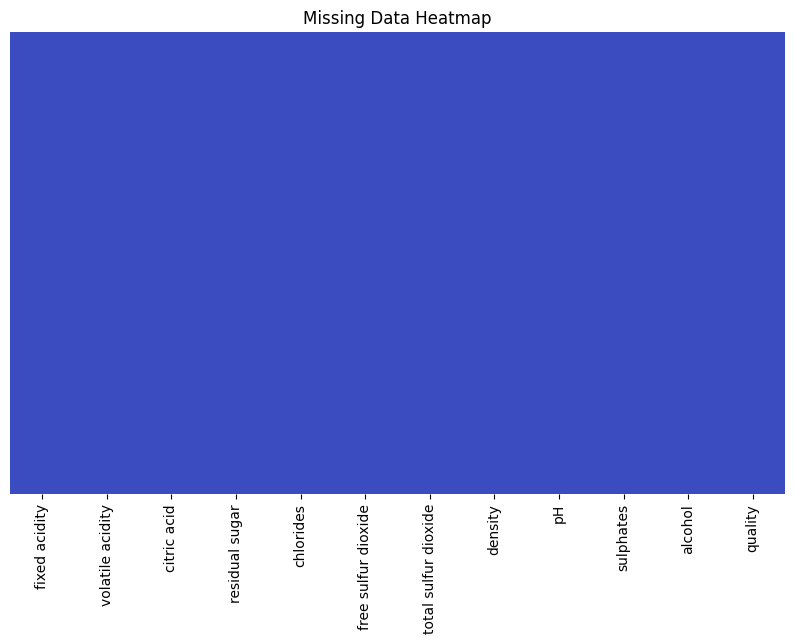

In [26]:
# Check for missing data
plt.figure(figsize=(10, 6))
sns.heatmap(final_df.isnull(), cbar=False, cmap="coolwarm", yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

There is no missing data in the dataset.

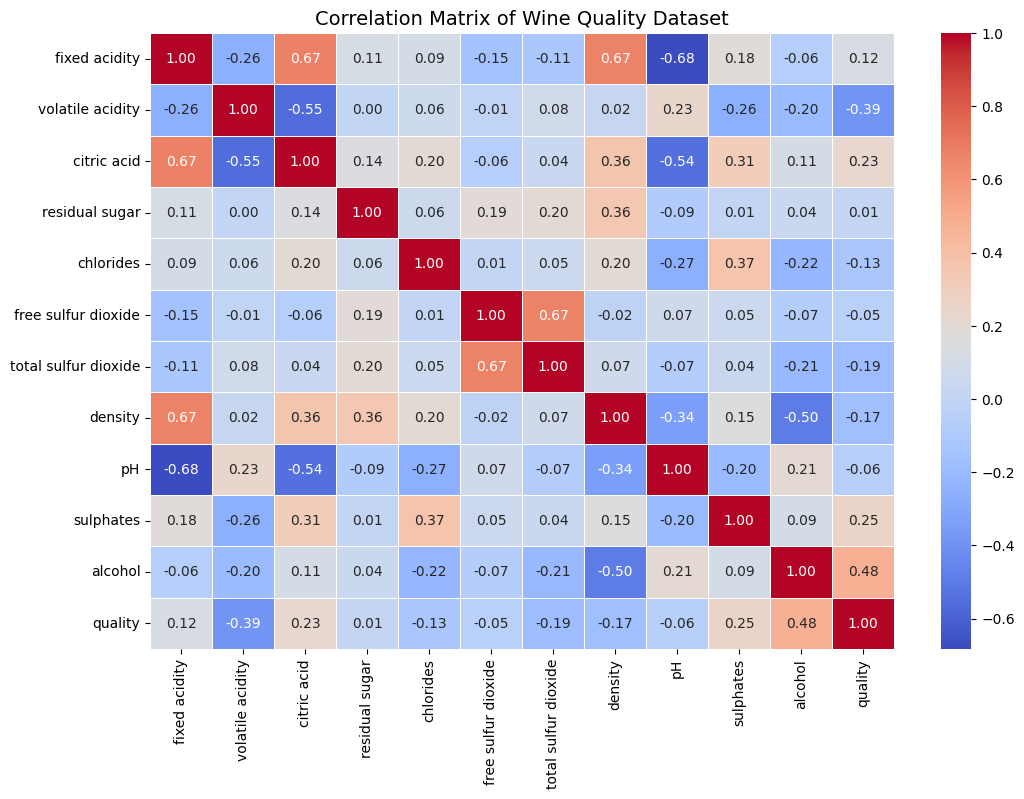

In [19]:
# Compute correlation matrix
corr_matrix = final_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Title for better readability
plt.title("Correlation Matrix of Wine Quality Dataset", fontsize=14)

# Show plot
plt.show()

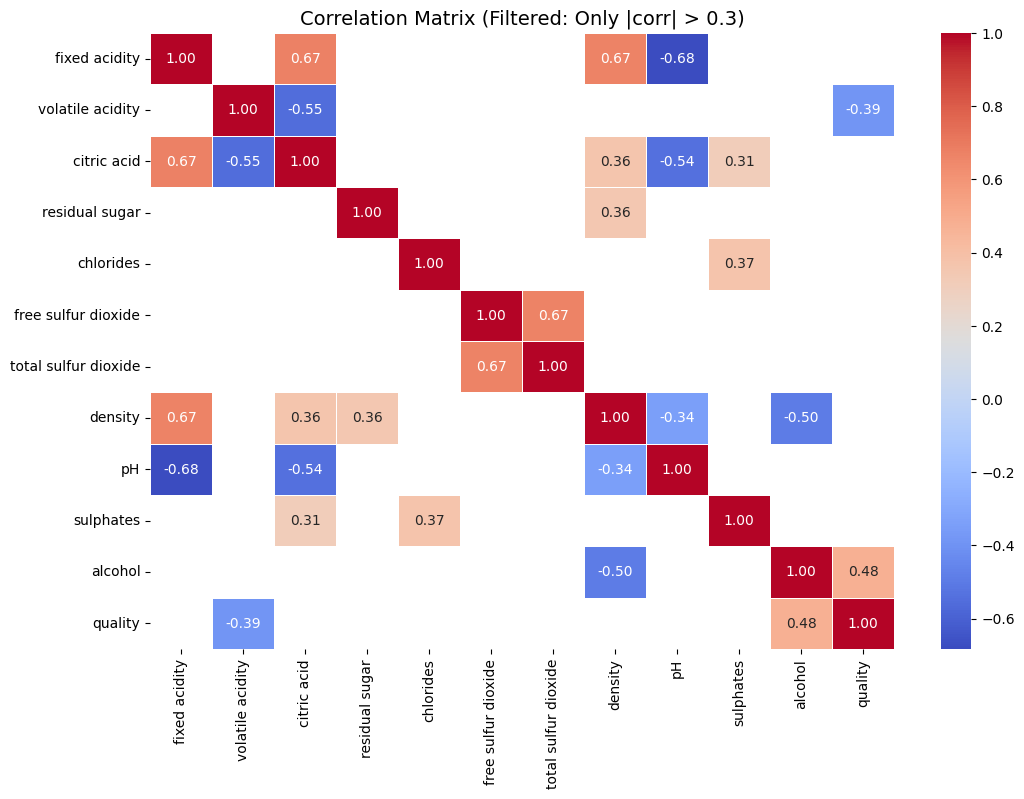

In [20]:
# Compute correlation matrix
corr_matrix = final_df.corr()

# Set a threshold (e.g., |correlation| > 0.3)
threshold = 0.3

# Create a mask to hide weak correlations
mask = np.abs(corr_matrix) < threshold

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    mask=mask,  # Apply the mask
)

# Title for readability
plt.title("Correlation Matrix (Filtered: Only |corr| > 0.3)", fontsize=14)

# Show plot
plt.show()

Only two features show a strong corelation with quality (>0.3): alcohol has a strong positive corelation with 0.48 while volatile acidity has a strong negative corelation of -0.39. Other noteworthy features are: citric acid and sulphates with 0.23 and 0.25 corelation value respectively.

There are also a few strong corelation between features. Some of these are total sulfur dioxide and free sulfur dioxide (0.67), fixed acidity and pH (0.68), fixed acidity and density (0.67), fixed acidity and citric acid (-0.67), and alchhol and density (-0.50).These pairs however don't have a strong enough corelation to merit removal.

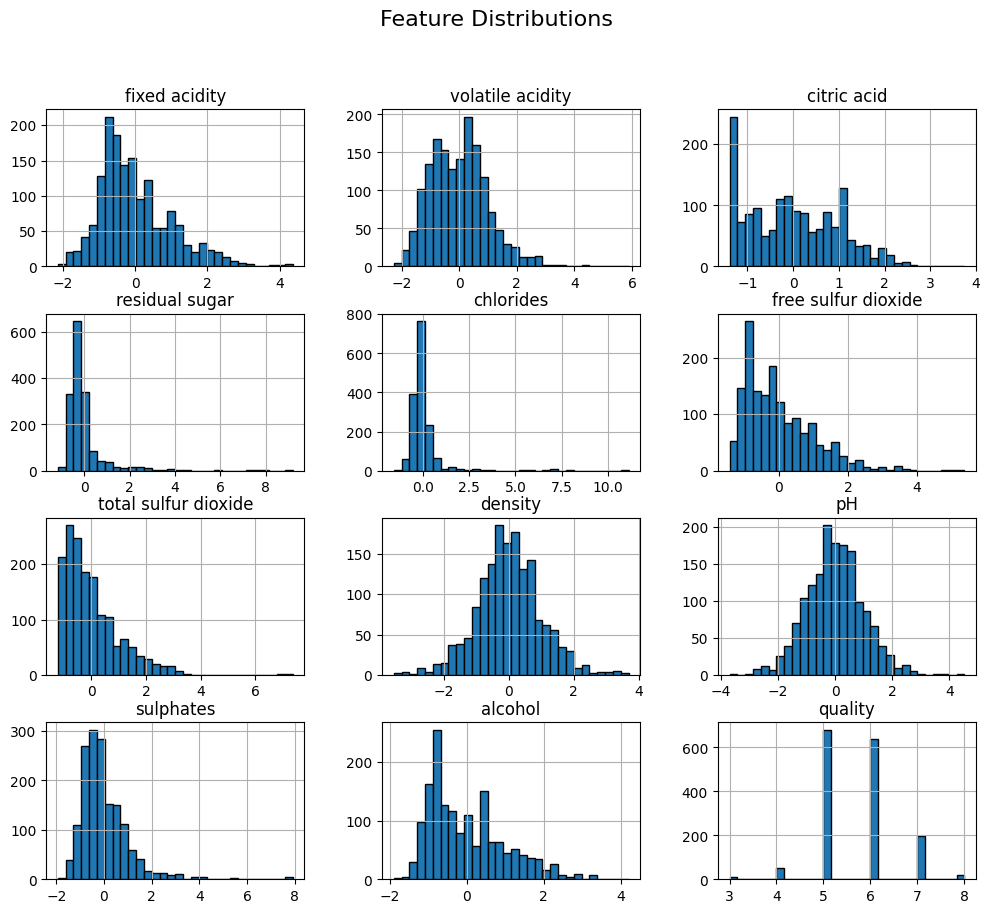

In [21]:
# Plot histograms for all numerical columns
final_df.hist(figsize=(12, 10), bins=30, edgecolor="black")

# Show plots
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

This graph is to show the different distributions for each feature. Most are following normal distributions with some skewing to the left. Citric acid is interesting since it does not follow normal distribution. Citric acid has a value -1.391472 (standardized) or 0 (nonstandardized) that occurs 132 times.

In [30]:
final_df["citric acid"].value_counts()

citric acid
-1.391472    132
 1.124700     68
-0.159061     51
-1.288771     50
-0.056360     38
            ... 
 2.665214      1
 2.254411      1
 2.305761      1
 2.459812      1
 2.613864      1
Name: count, Length: 80, dtype: int64

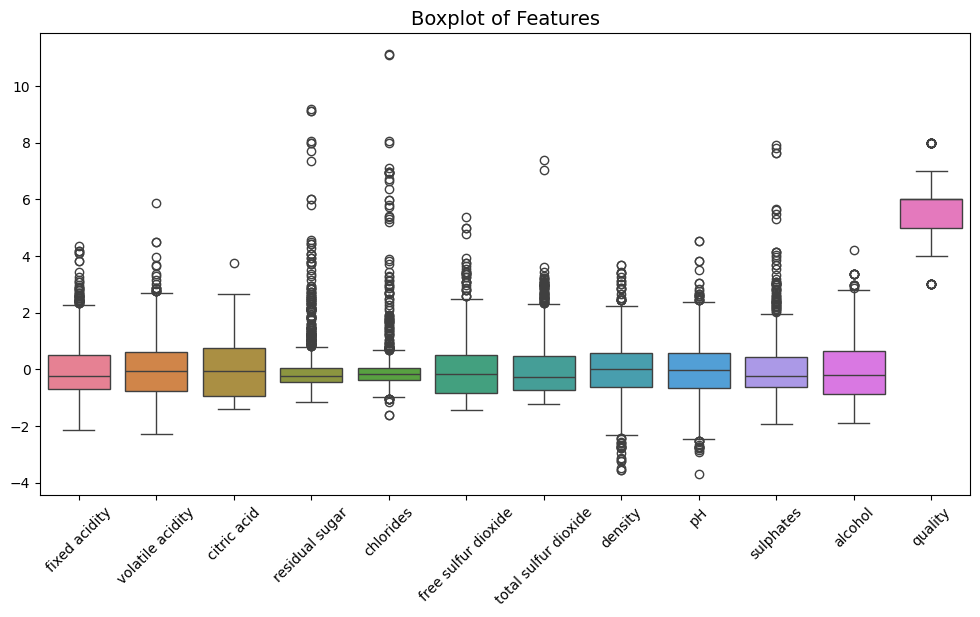

In [ ]:
# Set figure size
plt.figure(figsize=(12, 6))

# Create box plots for all numerical columns
sns.boxplot(data=final_df)

# Title
plt.title("Boxplot of Features", fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show plot
plt.show()

This is a boxplot for each feature to identify outliers. Residual sugar and chlorides have the most outliers in the data while citric acid has the least.

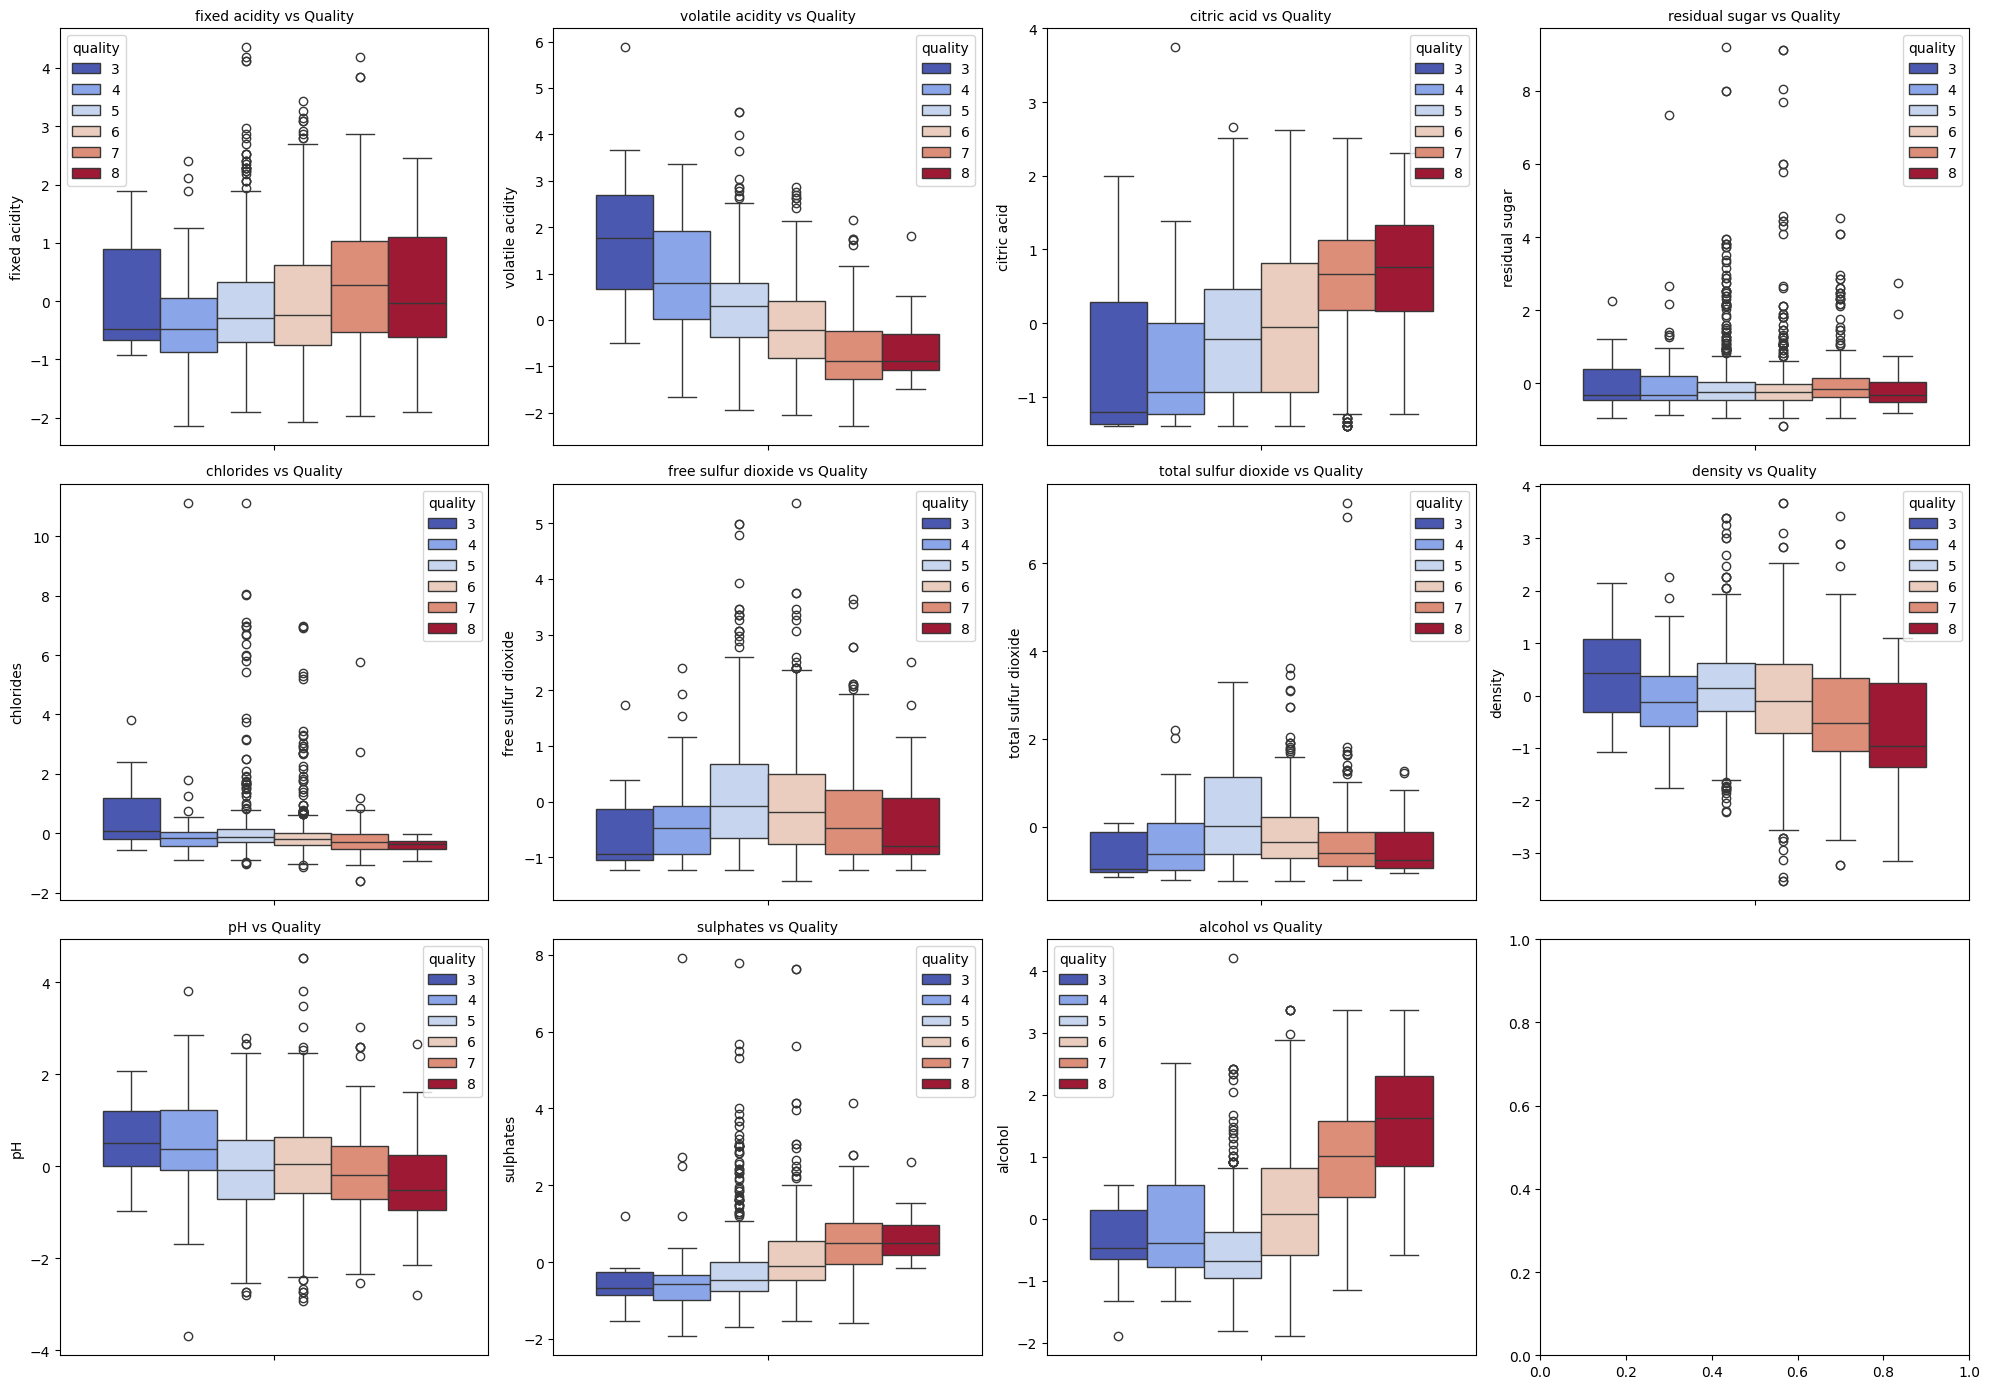

In [31]:
fig, axes = plt.subplots(3, 4, figsize=(20, 14))  # Adjust grid size based on features
axes = axes.flatten()

for i, col in enumerate(final_df.columns[:-1]):  # Exclude 'quality' itself
    sns.boxplot(hue=final_df["quality"], y=final_df[col], ax=axes[i], palette="coolwarm")
    axes[i].set_title(f"{col} vs Quality", fontsize=10)

plt.tight_layout()
plt.show()

This graph displays the boxplot of each feature against their quality value. This graphically shows the distribution of the feature per quality value. Higher citric acid tends to have an increase in quality value. Also citric acid generated a small number of outliers. The positive and negative correlations described in the correlation heatmap can be neatly seen here as well.